In [8]:
from utils.storage_management import check_path
import os

root = '../'
subjects_dir = os.path.join(root, 'Source/Subjects')
subject_name = input('Enter subject name')
subject_home = os.path.join(subjects_dir, subject_name)
check_path(subject_home)
check_path(os.path.join(subject_home, 'Raw'))
resp_lock = os.path.join(subject_home, 'RespLock')
check_path(resp_lock)
stim_lock = os.path.join(subject_home, 'StimLock')
check_path(stim_lock)
cases = ['LI', 'LM', 'RI', 'RM']
n_sessions = input('Enter number of sessions')
n_sessions = int(n_sessions)
for lock, path in zip(['Resp', 'Stim'], [resp_lock, stim_lock]):
    for case in cases:
        lock_case = os.path.join(path, case)
        check_path(lock_case)
        for session in [f'B{i+1}' for i in range(n_sessions)]:
            check_path(os.path.join(lock_case, f'{lock}Cor_{case}_{session}'))


In [2]:
import numpy as np

population1 = np.random.normal(0, 10, (1000, 200))
population2 = np.random.normal(0, 10, (500, 200))
population3 = np.random.normal(0, 10, (1500, 200))
populations = [population1, population2, population3]

distances = [[np.random.random() for _ in range(8)] for _ in range(3)]

weighted_populations = [
    [
        population * d
        for d in distance
    ]
    for population, distance in zip(populations, distances)
]


sources = list()
for i in range(8):
    source = 0
    for population in weighted_populations:
        source += population[i].sum(0)
    sources.append(source)

sources = np.array(sources)
sources.shape

(8, 200)

In [67]:
n_channels, n_times, n_sources = 64, 200, 8

X = np.random.normal(0, 10, (n_channels, n_times))
W = np.random.normal(0, 10, (n_channels, n_sources))

S = W.T@X

A = np.cov(X)@W@np.linalg.inv(np.cov(S)).T

In [70]:
X

array([[  9.53704326,   1.86266691, -12.6592942 , ...,   2.00604054,
         -3.21962407,   8.0551545 ],
       [  4.24519388,  11.82034403,   1.5903945 , ..., -10.59931645,
          5.65608177,   2.48245014],
       [ 13.79934506, -12.77524759,   1.37022081, ...,   1.76964957,
        -16.46969693,  -9.70385493],
       ...,
       [  7.31288554,  -2.24281422,  -7.67733641, ...,  -0.60059529,
         -0.10969874,  -3.72671739],
       [ -2.7719928 ,  11.01537075,  14.16912852, ...,  14.80614536,
         -1.9972261 ,  -3.12332061],
       [ 13.19415309,   0.9895375 ,  -5.22325352, ...,  -1.51606943,
          9.50273401,   0.17615618]])

In [69]:
A@S

array([[ 4.38399472, -0.42092097, -4.67178861, ..., -0.86990082,
         0.88134597,  8.22566729],
       [-0.32707323,  4.18462554,  2.07853435, ..., -4.86127412,
         2.41346551,  6.5734899 ],
       [ 3.60956341, -0.31238273,  0.74741762, ..., -7.71515793,
        -0.2645606 , -0.55249966],
       ...,
       [ 0.74145834, -3.94414979, -5.07489673, ...,  7.54926062,
        -0.9509328 ,  1.68523302],
       [-3.00482204,  3.33703663,  1.11076715, ...,  7.57937296,
         1.12245129, -0.91072893],
       [-0.22982245, -4.52615587,  0.42020379, ..., -4.35971551,
         2.55692274,  2.08186786]])

In [86]:
import numpy as np

# Define the mixing matrix A
n_sources, n_sensors = 40000, 8
n_times = 200
A = np.random.rand(n_sources, n_sensors)  # Distances from n_sources sources to n_sensors sensors

# Generate some random mixed sources
S_true = np.random.rand(n_sensors, n_times)  # Signals of n_sensors sensors

# Get sources signals from sensors
X = np.dot(A, S_true) # Assume S_true = LDM(MEG)

print(f'{X.shape} = {A.shape} x {S_true.shape}')

# Get sensors signals from sources
S_recovered = np.dot(np.linalg.pinv(A), X)

# Check the demixing error (difference betAeen true and recovered sources)
demixing_error = np.mean(np.abs(S_recovered - S_true))
print("Demixing Error:", demixing_error)


(40000, 200) = (40000, 8) x (8, 200)
Demixing Error: 6.100293339049434e-16


In [13]:
import numpy as np

# Define the mixing matrix A
n_sources, n_sensors = 400, 8
n_times = 200
A = np.random.rand(n_sensors, n_sources)  # Distances from n_sources sources to n_sensors sensors


# Generate some random mixed sensors
S_true = np.random.rand(n_sensors, n_times)  # Signals of n_sensors sensors

# Get sources signals from sensors
X = np.dot(A.T, S_true) # Assume S_true = LDM(MEG)

print(f'{X.shape} = {A.shape} x {S_true.shape}')

# Get sensors signals from sources
S_recovered = np.dot(np.linalg.pinv(A.T), X)

# Check the demixing error (difference betAeen true and recovered sources)
demixing_error = np.mean(np.abs(S_recovered - S_true))
print("Demixing Error:", demixing_error)


(400, 200) = (8, 400) x (8, 200)
Demixing Error: 4.0868567210972096e-16


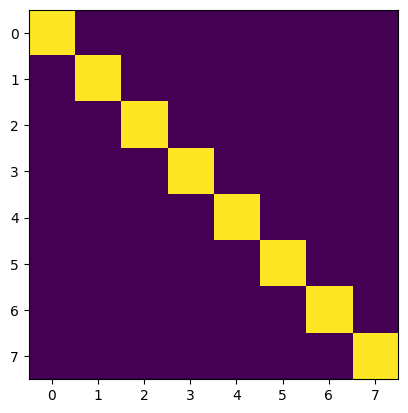

In [11]:
import matplotlib.pyplot as plt

A_ = np.linalg.pinv(A)
plt.imshow(A_@A)